In [1]:
import ltspice
import matplotlib.pyplot as plt
import numpy as np
import os

Matplotlib is building the font cache; this may take a moment.


[8.299081, 7.855469, 7.3913755, 6.9446454, 6.5297556]


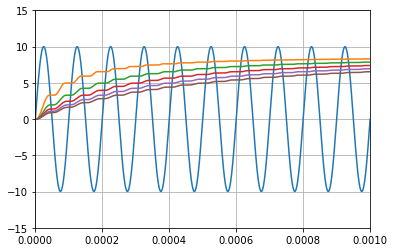

In [10]:
l = ltspice.Ltspice(os.getcwd()+'/rectifier.raw') 
l.parse() 

time = l.get_time()
V_source = l.get_data('V(source)')
V_cap_max = []

plt.plot(time, V_source)
for i in range(l.case_count): # Iteration in simulation cases
    time = l.get_time(i)
    # Case count starts from zero
    # Each case has different time point numbers
    V_cap = l.get_data('V(cap,pgnd)',i)
    V_cap_max.append(max(V_cap))
    plt.plot(time, V_cap)

print(V_cap_max)

plt.xlim((0, 1e-3))
plt.ylim((-15, 15))
plt.grid()
plt.savefig('rectifier.png')
plt.show()
